## Background Information
In this task we have to answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

#### Business Questions
    What was the best month for sales? How much was earned that month?
    What city sold the most product?
    What time should we display advertisemens to maximize the likelihood of customer’s buying product?
    What products are most often sold together?
    What product sold the most? Why do you think it sold the most?

### Setup

Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os                 # to read the files in directory

## Task 1: Reading and Merging the Sales data

In [3]:
#reading the file names from the directory
file_names = os.listdir('./Sales_Data')


all_months_data = pd.DataFrame()   #an empty dataframe for merging all the data

for file_name in file_names:
    one_month_data = pd.read_csv('./Sales_Data/'+file_name)
    all_months_data = pd.concat([all_months_data, one_month_data])

    

all_months_data.to_csv('all_months.csv', index=False)

In [25]:
all_data = pd.read_csv("all_months.csv")
print(all_data.shape)
all_data.head()

(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Task 2: Understanding and Cleaning up the data

In [26]:
all_data.info()

#found no missing value but there are Nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [27]:
# Checking the presence of nan values in each column
all_data.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [28]:
# Checking the quantity of nan values in each column
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [29]:
#getting the Nan values in the form of DataFrame.
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df.shape)
nan_df.head()

(545, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping NAN values


In [30]:
# dropping values with dropna()
all_data = all_data.dropna()

In [31]:
#Counter check the dropped values
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Removing Ambiguous Data
ValueError: invalid literal for int() with base 10: 'Or'

In [32]:
# Let's figure out the the second issue of  ValueError: invalid literal for int() with base 10: 'Or'
# There are some values with 'Or' and other type of string, let's find out

intrupted_values = all_data[all_data['Order Date'].str[0:2] == 'Or']
print(intrupted_values.shape)
intrupted_values.head()
# Now let's delete these values in next column

(355, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [33]:
# intrupted_values = all_data[all_data['Order Date'].str[0:2] == 'Or']
# In this above line of code. All the values which are equal to 'Or' are being stored with (==) operator.
# But what if we change it with != oprator.

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']     
#fetching data and then storing in the same dataframe only those values
print(all_data.shape)
all_data.head()

(185950, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Setting up the Data type of the columns to correct
can't multiply sequence by non-int of type 'str'


In [39]:
# Let's use a different way to conversion, pd.to_numeric(dataframe name['column name']), it will make both the column integer
# and float respectively.

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])      #make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Task 3: Augment Data with some additional columns based on Business Questions

### Add Month Column

In [34]:
all_data['Month'] = all_data['Order Date'].str[0:2]    #inserting only first two characters from the 'Order Date'.
all_data['Month'] = all_data["Month"].astype('int')   # at first we got the error of Nan values, need to clean up the data.
all_data.head()


# we can do mapping here and can add the month name instead of number.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


When tried adding new column and changing its type got the following errors:

    at first we got the error of Nan values, need to clean up the data.

After removing NaN values we got the following issue

    ValueError: invalid literal for int() with base 10: 'Or'
    
to solve this, we need to remove the data which contain's 'Or' value in Months columns.


### Add a sales column

In [40]:
#quantity order times price each give us sales.
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

## faced the error for first execution, after cleanin the data, got the desired answer.
# Error: "Can't multiply sequence by non-int of type 'str'"

After running this above statment, got the following error.

    can't multiply sequence by non-int of type 'str'
    
solved this in cleaning part of the code and ran this line of code again.

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Adding a City Column.

In [88]:
# There could be multiple ways to add a city. Let's try some

# Method one, The pythonic way.
# address = list(all_data['Purchase Address'])
# cities = []
# for add in address:
#     add = add.split(",")[1]
#     add = add.strip()
#     cities.append(add)

# all_data['City'] = cities
# all_data.iloc[67000:67010]




# The above method is more expensive memory wise.
# Method two: with the help of lambda function and .apply() method(it allows us to apply some fuctions which we want)

def get_city(address):
    return address.split(',')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x:get_city(x))

all_data.iloc[67000:67010]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
67325,161798,Wired Headphones,1,11.99,02/09/19 22:02,"950 River St, Austin, TX 73301",2,11.99,Austin
67326,161799,Lightning Charging Cable,1,14.95,02/01/19 11:10,"828 Hickory St, Seattle, WA 98101",2,14.95,Seattle
67327,161800,20in Monitor,1,109.99,02/28/19 09:21,"572 12th St, New York City, NY 10001",2,109.99,New York City
67328,161801,Lightning Charging Cable,1,14.95,02/25/19 15:10,"658 4th St, San Francisco, CA 94016",2,14.95,San Francisco
67329,161802,27in FHD Monitor,1,149.99,02/22/19 18:31,"39 Meadow St, Los Angeles, CA 90001",2,149.99,Los Angeles
67330,161803,USB-C Charging Cable,1,11.95,02/28/19 12:26,"103 Ridge St, Los Angeles, CA 90001",2,11.95,Los Angeles
67331,161804,Lightning Charging Cable,1,14.95,02/22/19 21:24,"533 Washington St, Atlanta, GA 30301",2,14.95,Atlanta
67332,161805,AA Batteries (4-pack),1,3.84,02/17/19 23:21,"311 Washington St, New York City, NY 10001",2,3.84,New York City
67333,161806,iPhone,1,700.00,02/16/19 07:55,"861 Ridge St, Seattle, WA 98101",2,700.00,Seattle
67334,161806,Apple Airpods Headphones,1,150.00,02/16/19 07:55,"861 Ridge St, Seattle, WA 98101",2,150.00,Seattle


Here we may have a little bit of confused data in City column, because there are some cities in the USA having identica names like Manhattan, Kansas and Manhattan, New York, Austin, Texas and Austin, Minnesota. So, we also need to fetch the state along with the city. So, we will write another function along with the get_city()

In [90]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
# here the second split is for state. After first split it then split the output based on space, and we picked the 1st
# index because 0th index is a space in output

all_data['City']= all_data['Purchase Address'].apply(lambda x:get_city(x) + " " + "(" + get_state(x) + ")")  
# we can also use the f string like this .apply(lambda x: f"{get_city(x)} ({get_state(x)}")  
 
all_data.iloc[67000:67010]


# Now we can go back to our task 2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
67325,161798,Wired Headphones,1,11.99,02/09/19 22:02,"950 River St, Austin, TX 73301",2,11.99,Austin (TX)
67326,161799,Lightning Charging Cable,1,14.95,02/01/19 11:10,"828 Hickory St, Seattle, WA 98101",2,14.95,Seattle (WA)
67327,161800,20in Monitor,1,109.99,02/28/19 09:21,"572 12th St, New York City, NY 10001",2,109.99,New York City (NY)
67328,161801,Lightning Charging Cable,1,14.95,02/25/19 15:10,"658 4th St, San Francisco, CA 94016",2,14.95,San Francisco (CA)
67329,161802,27in FHD Monitor,1,149.99,02/22/19 18:31,"39 Meadow St, Los Angeles, CA 90001",2,149.99,Los Angeles (CA)
67330,161803,USB-C Charging Cable,1,11.95,02/28/19 12:26,"103 Ridge St, Los Angeles, CA 90001",2,11.95,Los Angeles (CA)
67331,161804,Lightning Charging Cable,1,14.95,02/22/19 21:24,"533 Washington St, Atlanta, GA 30301",2,14.95,Atlanta (GA)
67332,161805,AA Batteries (4-pack),1,3.84,02/17/19 23:21,"311 Washington St, New York City, NY 10001",2,3.84,New York City (NY)
67333,161806,iPhone,1,700.00,02/16/19 07:55,"861 Ridge St, Seattle, WA 98101",2,700.00,Seattle (WA)
67334,161806,Apple Airpods Headphones,1,150.00,02/16/19 07:55,"861 Ridge St, Seattle, WA 98101",2,150.00,Seattle (WA)


### Business Question 1: What was the best month for sales? How much was earned that month?

In [47]:
best_month = all_data.groupby('Month').sum()
best_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Here we can see that December (12th Month) is the best month with the higest sales and maximum income.

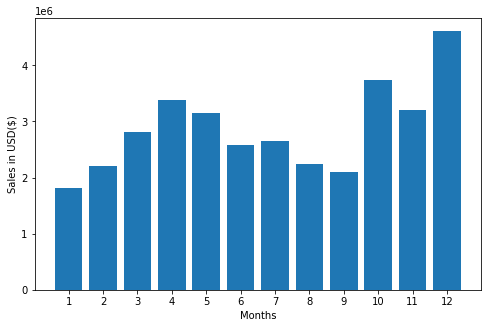

In [58]:
#plotting the above results

months = range(1,13)

fig = plt.figure(figsize=(8,5))
plt.bar(months, best_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Months')
plt.show()

We can clearly see that December is leading while January is lagging even behind the September. It makes sense that there Christmas and also new year preparations so, it is obvious December has highest sales.

### Business Question 2: Which city sold the most product?

In [60]:
all_data.head()


# So before doing this task, we need to have a city name column. Let's go back to Augmenting new column seciont of the file

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [94]:
city_sales = all_data.groupby("City").sum()
city_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


Here we can see that San Francisco (CA) is beating all the other cities.

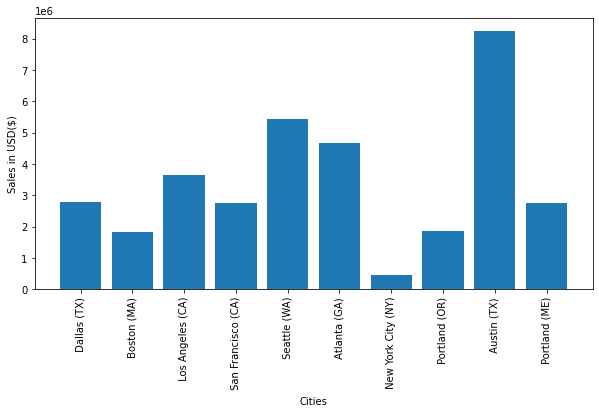

In [107]:
#plotting the cities (above data)

Cities = all_data['City'].unique()

fig = plt.figure(figsize=(10,5))
plt.bar(Cities, city_sales['Sales'])
plt.xticks(Cities, rotation = 'vertical')
plt.ylabel('Sales in USD($)')
plt.xlabel('Cities')
plt.show()

OOoooooooooopppppppssssssssss !!!!!!!!!!!! The problem here is that now this chart is showing Austin as the highest ranked city in sales. But the actual results are other. The thing happend here is all_data['City'].unique(), it made the data in different order, so we need to keep the data in same order. In order to do that, let's look at the next line of the code.

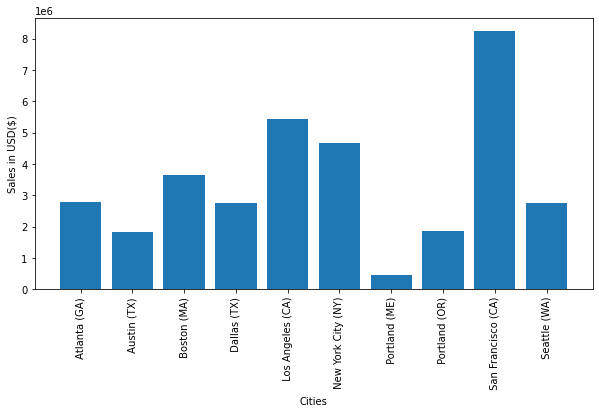

In [108]:
#plotting the correct city as highest ranked city.

Cities = [city for city, df in all_data.groupby('City')]
#It will pick the city from city which will come from group by function

fig = plt.figure(figsize=(10,5))
plt.bar(Cities, city_sales['Sales'])
plt.xticks(Cities, rotation = 'vertical')
plt.ylabel('Sales in USD($)')
plt.xlabel('Cities')
plt.show()

### Business Question 3: What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [111]:
# For this question we can probabliy go into more detail of Order Date column and separate it and then check at what hour of the
# day, the advertisements is needed.

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [112]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 13.5+ MB


In [114]:
#Converting to datetime.

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [115]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 13.5+ MB


In [117]:
# Fetching the hour and minutes

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


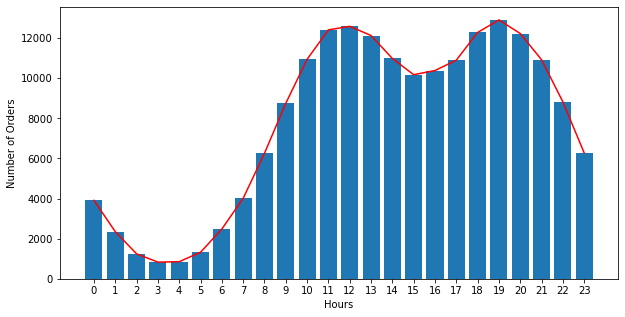

In [136]:
hour = [hour for hour, df in all_data.groupby('Hour')]

count_of_sales = all_data.groupby(all_data['Hour']).count()       
#this line will group the data by hour and counts all the values.


fig = plt.figure(figsize=(10,5))
plt.bar(hour,count_of_sales.Sales)
plt.plot(hour,count_of_sales.Sales, color='r')
plt.xticks(hour)
# plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()



According to my understanding the advertisments should be played at 11am to 12pm and 5 to 7pm to maximise the Number of orders.

## Business Question 4: What products are most often sold together?

In [141]:
all_data.head(20)

# If we look at our data in details, there are some duplicate OrderID and Address.
# There is highly possibility that the products in the same order are sold together

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14,5


In [165]:
# So, to get the duplicate orderId of the products, let's make a new dataframe

duplicate_df = all_data[all_data['Order ID'].duplicated(keep=False)]
print(duplicate_df.shape)
duplicate_df.head(10)

(14649, 11)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7


In [166]:
# Now, let's group the products which are sold together.

duplicate_df['Groupped_Products'] = duplicate_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


<ipython-input-166-f4b8c91118cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df['Groupped_Products'] = duplicate_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [167]:
duplicate_df.head(20)

# Now we see the Groupped_Products column but the data is duplicated. Because it was available in both rows. So let's
# delete the one row of each duplicate.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Groupped_Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [177]:
duplicate_df = duplicate_df[['Order ID', 'Groupped_Products']].drop_duplicates()
#This line of code will drop the duplicates and will just store the Order ID and Groupped_Products in the duplicate_df

print(duplicate_df.shape)
duplicate_df.head()

(7136, 2)


,Order ID,Groupped_Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [206]:
# Now we need to count the pairs which occur together. We need to use some other libraries for this task

from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicate_df['Groupped_Products']:
    row_list = row.split(',')           #converting the row values to list with comma split
    count.update(Counter(combinations(row_list, 2)))
                 
                 
# print(count)
# count.most_common(10)
#most_common methods only brings the first 10 items.


for k, v in count.most_common(10):
    print(k, v)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


If we consider the two products the iPhone and Lightning Charging Cable sold together most of the time. Trying other combinations with these two products will definitely bring more customers/sales.

In [212]:
# if we need most commonly sold 3 items in a row

count = Counter()

for row in duplicate_df['Groupped_Products']:
    row_list = row.split(',')           #converting the row values to list with comma split
    count.update(Counter(combinations(row_list, 3)))
    
for k, v in count.most_common(10):
    print(k, v)
    
# and if you need more combination, keep increasing the second argument of .update(Counter(Combinations(row_list, ?)))

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


If we consider the Three products the Google Phone, USB-C Charging Cable and Wired Headphones sold together most of the time.

## Business Quesiton 5: What product sold the most? Why do you think it sold the most?

In [213]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


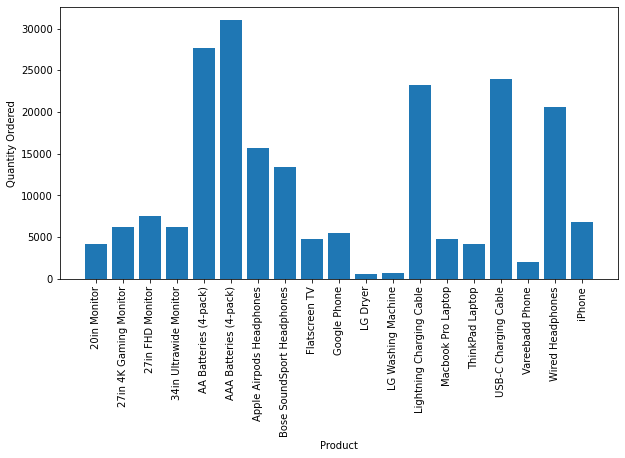

In [229]:
product_group = all_data.groupby('Product')
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()


products = [product for product, df in product_group]   #fetching individual products from the product_group


# simple plotting
fig = plt.figure(figsize=(10,5))
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation="vertical")
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

Immediate response is as AAA Batteries are cheap. But as a Data Sceintist there should be some proof.

##### Overlay this above graph with unit price of each product. (Adding second y axis in the above graph.)

In [230]:
price = all_data.groupby('Product').mean()['Price Each']
price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-372-5c57f502ffb2>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=12)


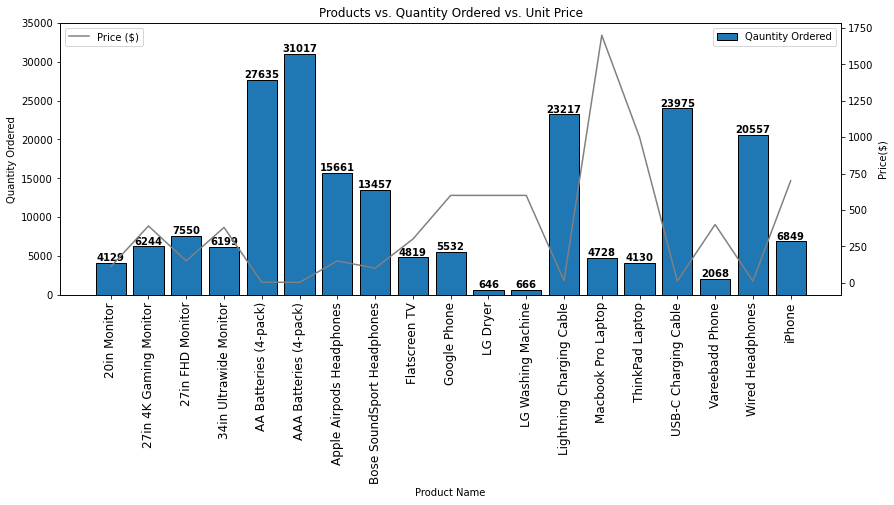

In [372]:
#Let's plot both the sales mean and product sold most


#creating subplot for two plotting in same area.
fig, ax1 = plt.subplots(1,1,figsize=(14,5))

#twinning the axes
ax2 = ax1.twinx()

# 1st plot on 1st axis
ax1.bar(products,quantity_ordered, ec='black', label="Qauntity Ordered")

#2nd plot on second axis in same area as axis 1
ax2.plot(products,price, color="gray", label="Price ($)")

# applying legends to both plots/axis
ax1.legend(loc=0)
ax2.legend(loc="upper left")

#adding title to the chart
plt.title("Products vs. Quantity Ordered vs. Unit Price")

#adding axis labels to both axis.
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax1.set_xticklabels(products, rotation='vertical', size=12)
ax1.set_ylim(0,35000)
ax2.set_ylabel('Price($)')



#adding number of quantity sold on each bar.
for i in range(len(quantity_ordered)):
    ax1.text(i,quantity_ordered[i], quantity_ordered[i], ha='center', va='bottom',
             rotation='horizontal', fontweight='semibold')

#adding price on each point on the line graph for price.
# for j in range(len(price)):
#     ax2.text(j,price[j], round(price[j],1), ha='center', va='baseline',
#              rotation='vertical', color = "red", fontweight='normal')
    


The price for AAA Batteries is less that's why it sold the most and the price of Dryer and Washing Machine is high and they last for a long time, hat's why their sale is low. Also the price of 27in FHD Monitor that is slod more as compared to the price. The reason is that it's price is in moderate category but it sold less because they last for a longer time.